# <font color = maroon>Bike Sharing Demand</font>

### Reading and Understanding the data

In [1]:
# importing the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reading the csv file into a dataframe
bike_df = pd.read_csv("day.csv")

In [3]:
# Checking some of the values of the data frame
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of the dataframe
bike_df.shape

(730, 16)

In [5]:
# Checking if any null values are present in the dataset
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no null values present in the dataset

In [6]:
# Checking the data type of all variables in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking the numerical variables
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Drop the duplicate records present in the dataframe if any
bike_df = bike_df.drop_duplicates()

In [9]:
# Checking the shape of bike_df after dropping the duplicates 
bike_df.shape

(730, 16)

- The shape remains the sape which means there were no duplicates present in the bike_df dataframe

# Data Preparation

### Removing unwanted columns

- instant : The column instant is record index value which contains unique id for every record. This variable is not required for the model.
- dteday : The column dteday is a date column. We already have month and year column which we can use for our model
- casual and registered : We have a column cnt which is the sum of both casual and registered so we can use that instead of two different variables

In [10]:
bike_df.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)

In [11]:
#Checking the shape of bike_df after removing unwanted columns
bike_df.shape

(730, 12)

### Season variable

In [12]:
bike_df['season']

0      1
1      1
2      1
3      1
4      1
      ..
725    1
726    1
727    1
728    1
729    1
Name: season, Length: 730, dtype: int64

In [13]:
# Changing the Season column values to appropriate values
bike_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [14]:
bike_df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

### Weathersit variable

In [15]:
bike_df['weathersit']

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

In [16]:
# Changing the weathersit column values to appropriate values
bike_df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",
                               4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)

In [17]:
bike_df['weathersit']

0           Mist_cloudy
1           Mist_cloudy
2      Clear_Few Clouds
3      Clear_Few Clouds
4      Clear_Few Clouds
             ...       
725         Mist_cloudy
726         Mist_cloudy
727         Mist_cloudy
728    Clear_Few Clouds
729         Mist_cloudy
Name: weathersit, Length: 730, dtype: object

### Month variable

In [18]:
bike_df['mnth']

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: int64

In [19]:
# Changing the weathersit column values to appropriate values
bike_df['mnth'].replace({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",
                               10:"October",11:"November",12:"December"},inplace=True)

In [20]:
bike_df['mnth']

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

### Weekday variable

In [21]:
bike_df['weekday']

0      1
1      2
2      3
3      4
4      5
      ..
725    5
726    6
727    0
728    1
729    2
Name: weekday, Length: 730, dtype: int64

In [22]:
# Changing the weekday column values to appropriate values
bike_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [23]:
bike_df['weekday']

0         Monday
1        Tuesday
2      Wednesday
3       Thursday
4         Friday
         ...    
725       Friday
726     Saturday
727       Sunday
728       Monday
729      Tuesday
Name: weekday, Length: 730, dtype: object

In [24]:
#Checking the datatype of all variables
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


In [25]:
# Converting the variables mnth se

# Visualising the Data

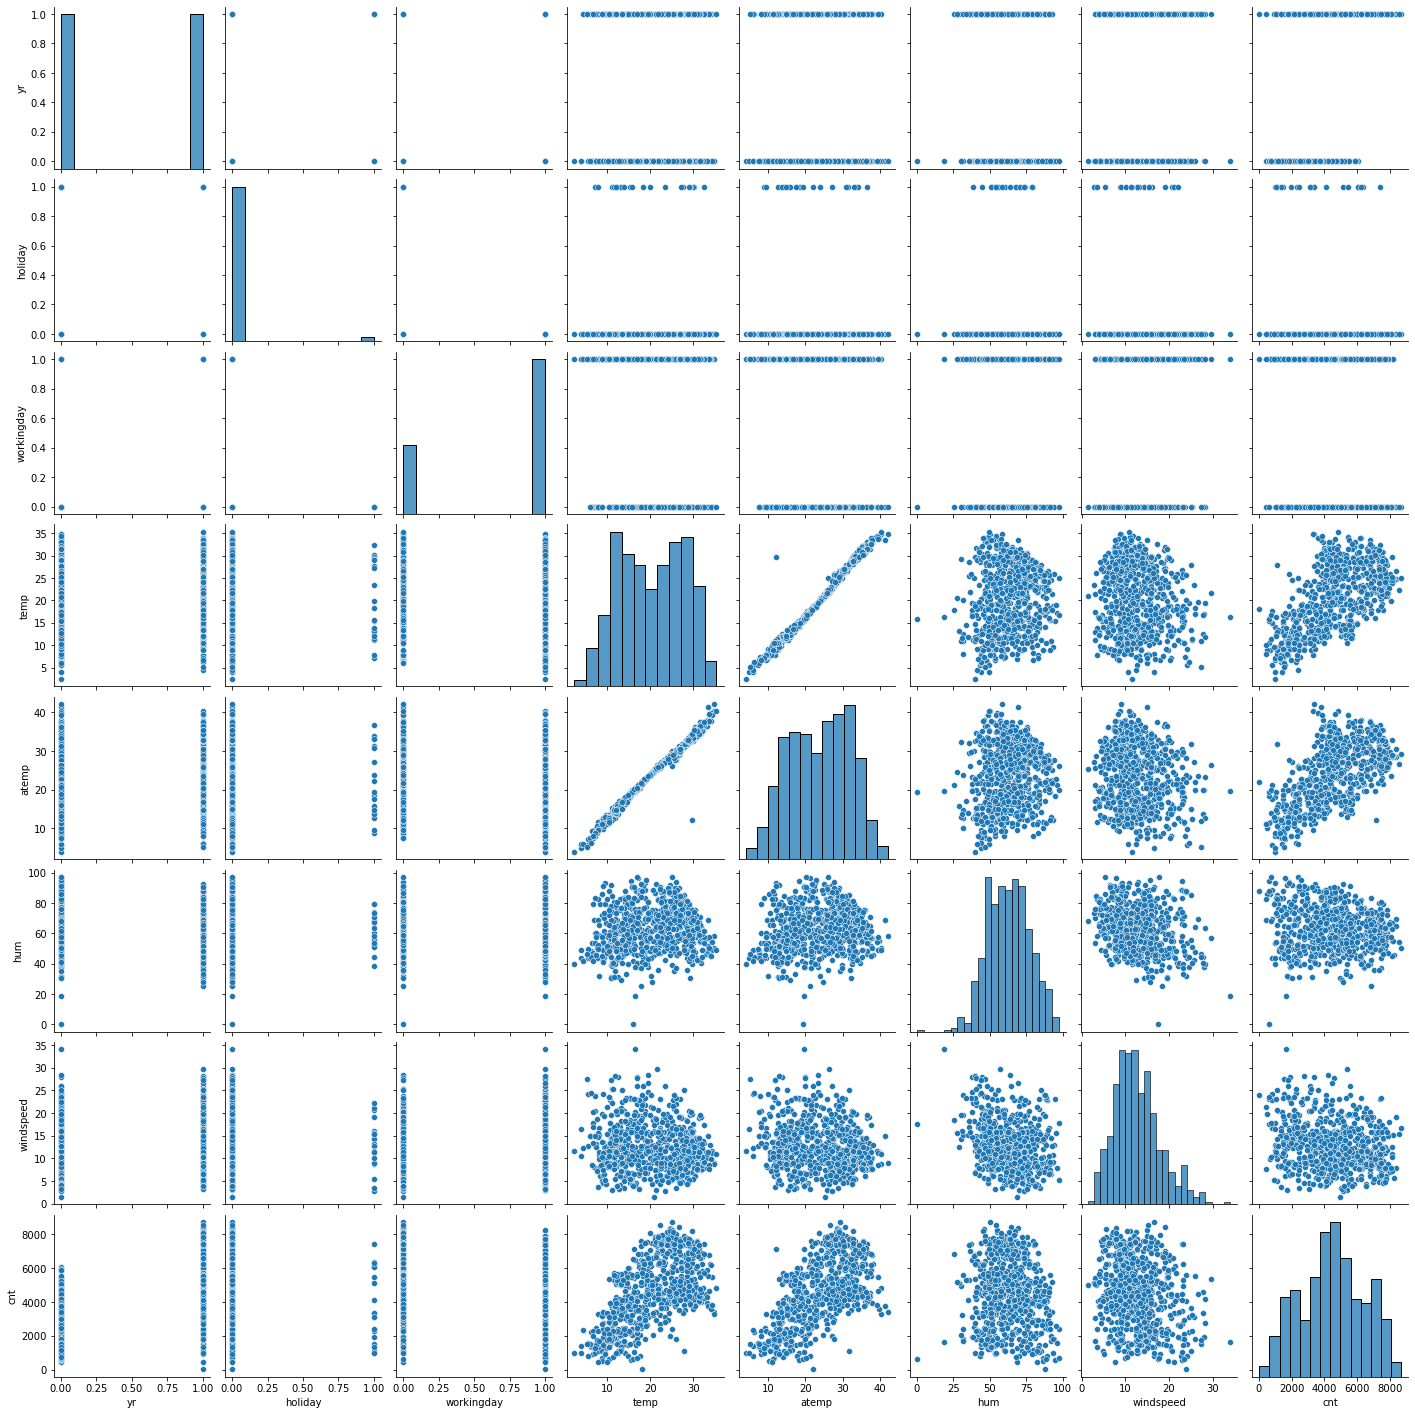

In [26]:
#Plotting all numerical variables in a pairplot
sns.pairplot(bike_df)
plt.show()

- From these pairplots it can be seen that temp and atemp variable have some correlation with cnt variable

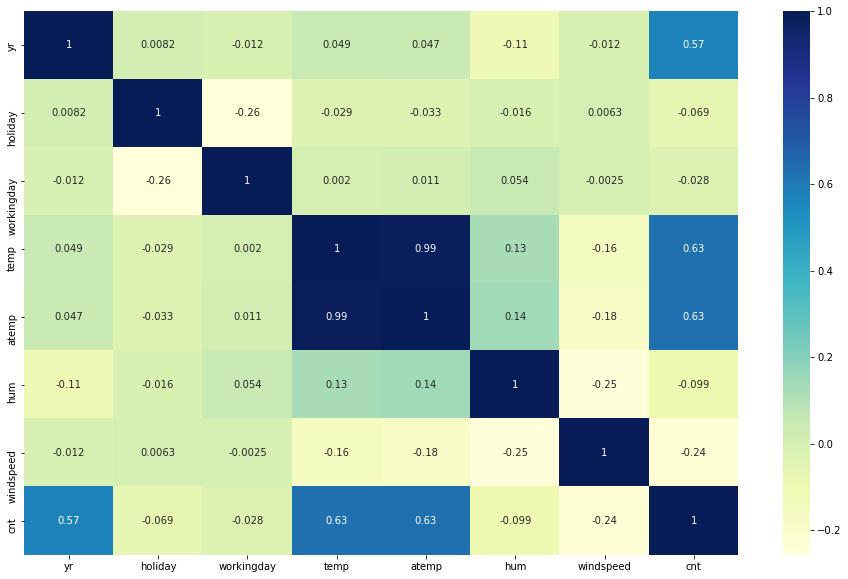

In [27]:
# Plotting a heatmap for the variables
plt.figure(figsize = (16, 10))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- From the heatmap too it is clear that temp and atemp have some correlation with cnt(target) variable

### Visualising categorical variables

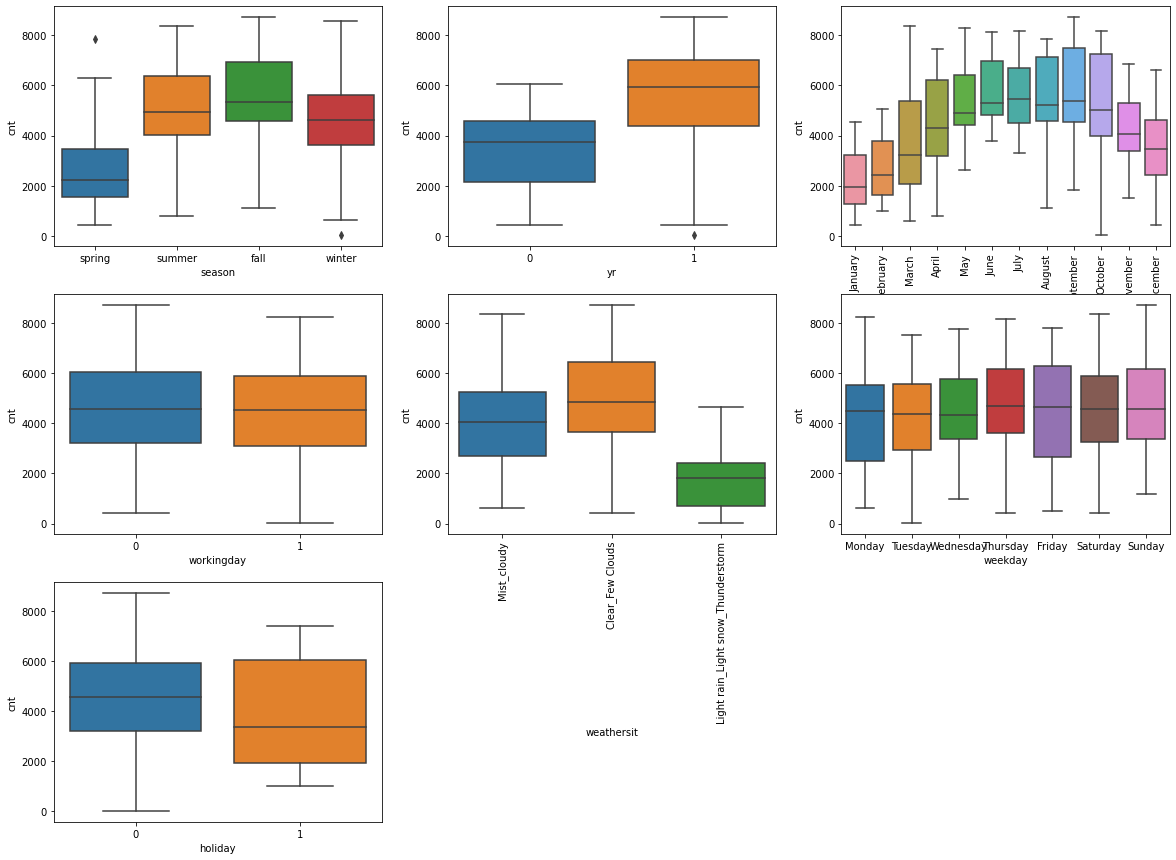

In [28]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.xticks(rotation = 90)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.xticks(rotation = 90)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.show()

- From the above graphs, the following points can be inferred :
    - Distribution of cnt variable is different for all seasons so season is a factor which could impact the count of bikes rented
    - More bikes were rented in 2019 as compared to 2018
    - The count of bikes rented increased in June month then decreased a little in July and then increased again till september
    - More bikes were rented when the weather was clear or had few clouds

# Dummy Variables

In [29]:
# Creating Dummy variables for categorical variables : season, mnth, weekday, weathersit and dropping the first column
cols = ['season','mnth', 'weekday', 'weathersit']
dummy_var=pd.get_dummies(bike_df[cols],drop_first=True)

In [30]:
dummy_var.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
bike_df = pd.concat([bike_df,dummy_var],axis = 1)

In [33]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,spring,0,January,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Dropping the variables season,mnth,weekday and weathersit as they are no longer required
bike_df.drop(['season','mnth', 'weekday', 'weathersit'],axis = 1,inplace = True)

In [35]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bike_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0


# Splitting the data into Train and Test data

In [37]:
# Splitting into 70:30 ratio for train and test data of bike_df
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
df_train.shape

(510, 30)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             510 non-null    int64  
 1   holiday                                        510 non-null    int64  
 2   workingday                                     510 non-null    int64  
 3   temp                                           510 non-null    float64
 4   atemp                                          510 non-null    float64
 5   hum                                            510 non-null    float64
 6   windspeed                                      510 non-null    float64
 7   cnt                                            510 non-null    int64  
 8   season_spring                                  510 non-null    uint8  
 9   season_summer                                  510 no

In [40]:
df_test.shape

(219, 30)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   yr                                             219 non-null    int64  
 1   holiday                                        219 non-null    int64  
 2   workingday                                     219 non-null    int64  
 3   temp                                           219 non-null    float64
 4   atemp                                          219 non-null    float64
 5   hum                                            219 non-null    float64
 6   windspeed                                      219 non-null    float64
 7   cnt                                            219 non-null    int64  
 8   season_spring                                  219 non-null    uint8  
 9   season_summer                                  219 no

# Scaling

- In this step the following numerical variables will be scaled using MinMaxScaler
    - atemp
    - hum
    - windspeed
    - cnt

In [42]:
numerical_var = ['temp','atemp','hum','windspeed','cnt']

In [43]:
scaler = MinMaxScaler()
df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

In [44]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [45]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing train set
- Here df_train is divided into two parts X_train and y_train which contains the feature variable and target variable respectfully

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

# RFE
- We will be first using RFE(Recursive Feature Elimination) which will rank the variables in the set in order of importance so that we can eliminate the variables which are not required for our model
- We will start with 15 variables and use a mixed approach

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 10),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', False, 15),
 ('mnth_May', False, 7),
 ('mnth_November', True, 1),
 ('mnth_October', False, 12),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_July', 'mnth_November', 'mnth_September',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_February', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_October', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [51]:
# X_train datafram with RFE selected variables
X_train_rfe = X_train[col]

# Building a Model

In [52]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                                            0.320243
yr                                               0.230328
holiday                                         -0.091228
temp                                             0.479977
hum                                             -0.160227
windspeed                                       -0.188457
season_spring                                   -0.061737
season_summer                                    0.040767
season_winter                                    0.103435
mnth_December                                   -0.037199
mnth_January                                    -0.043748
mnth_July                                       -0.055495
mnth_November                                   -0.040949
mnth_September                                   0.074891
weathersit_Light rain_Light snow_Thunderstorm   -0.248116
weathersit_Mist_cloudy                          -0.055876
dtype: float64

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.34e-189
Time:                        23:53:17   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3202      0.036      8.886      0.000       0.249       0.391
yr                                                0.2303      0.008     28.511      0.000       0.214       0.246
holiday                                          -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                                              0.4800      0.037     12.977      0.000       0.407       0.553
hum                                              -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                                        -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring                                    -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer                                     0.0408      0.015      2.659      0.008       0.011       0.071
season_winter                                     0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December                                    -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January                                     -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                                        -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November                                    -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September                                    0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light rain_Light snow_Thunderstorm    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Mist_cloudy                           -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Mist_cloudy,2.32
0,yr,2.09
11,mnth_November,1.83
9,mnth_January,1.75


- For now no factor seems to have higher p-value but the the variable 'hum' have very high VIF so that has to be dropped

In [55]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

### Building another model after removing 'hum'

In [56]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.57e-186
Time:                        23:53:17   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2466      0.032      7.679      0.000       0.184       0.310
yr                                                0.2343      0.008     28.709      0.000       0.218       0.250
holiday                                          -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                                              0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                                        -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring                                    -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer                                     0.0333      0.015      2.148      0.032       0.003       0.064
season_winter                                     0.0887      0.018      4.951      0.000       0.053       0.124
mnth_December                                    -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_January                                     -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July                                        -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_November                                    -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_September                                    0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light rain_Light snow_Thunderstorm    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Mist_cloudy                           -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_November,1.80
8,mnth_January,1.66
9,mnth_July,1.59
13,weathersit_Mist_cloudy,1.56


In [58]:
# Adding the variable workingday and creating the model again to check if the model improves
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0


In [59]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.13e-186
Time:                        23:53:17   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2646      0.033      8.069      0.000       0.200       0.329
yr                                                0.2342      0.008     28.835      0.000       0.218       0.250
holiday                                          -0.1090      0.027     -4.066      0.000      -0.162      -0.056
temp                                              0.4362      0.036     12.103      0.000       0.365       0.507
windspeed                                        -0.1590      0.025     -6.339      0.000      -0.208      -0.110
season_spring                                    -0.0719      0.021     -3.365      0.001      -0.114      -0.030
season_summer                                     0.0339      0.015      2.198      0.028       0.004       0.064
season_winter                                     0.0898      0.018      5.041      0.000       0.055       0.125
mnth_December                                    -0.0462      0.018     -2.627      0.009      -0.081      -0.012
mnth_January                                     -0.0503      0.018     -2.753      0.006      -0.086      -0.014
mnth_July                                        -0.0509      0.018     -2.769      0.006      -0.087      -0.015
mnth_November                                    -0.0411      0.019     -2.167      0.031      -0.078      -0.004
mnth_September                                    0.0677      0.017      3.984      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2939      0.024    -12.008      0.000      -0.342      -0.246
weathersit_Mist_cloudy                           -0.0833      0.009     -9.584      0.000      -0.100      -0.066
workingday                                       -0.0226      0.009     -2.447      0.015      -0.041      -0.004
==============================================================================
Omnibus:                       75.619   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.431
Skew:                          -0.772   Prob(JB):                     6.61e-40
Kurtosis:                       5.471   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,4.68
14,workingday,3.58
4,season_spring,3.08
6,season_winter,3.07
5,season_summer,2.31
0,yr,2.07
10,mnth_November,1.81
8,mnth_January,1.66
9,mnth_July,1.59


- Adding the Workingday variable in the model has improved the model a little bit so we will keep it

In [62]:
# Adding the variable atemp and creating the model again to check if the model improves
X_train_rfe['atemp']=X_train['atemp']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,atemp
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0.501133
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0.766351
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0.438975
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0.200348
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0.391735


In [63]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.52e-185
Time:                        23:53:18   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     493   BIC:                            -911.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2646      0.033      8.061      0.000       0.200       0.329
yr                                                0.2342      0.008     28.803      0.000       0.218       0.250
holiday                                          -0.1090      0.027     -4.059      0.000      -0.162      -0.056
temp                                              0.4250      0.137      3.102      0.002       0.156       0.694
windspeed                                        -0.1586      0.026     -6.169      0.000      -0.209      -0.108
season_spring                                    -0.0721      0.022     -3.338      0.001      -0.115      -0.030
season_summer                                     0.0336      0.016      2.131      0.034       0.003       0.065
season_winter                                     0.0895      0.018      4.921      0.000       0.054       0.125
mnth_December                                    -0.0462      0.018     -2.625      0.009      -0.081      -0.012
mnth_January                                     -0.0503      0.018     -2.747      0.006      -0.086      -0.014
mnth_July                                        -0.0510      0.018     -2.765      0.006      -0.087      -0.015
mnth_November                                    -0.0411      0.019     -2.166      0.031      -0.078      -0.004
mnth_September                                    0.0676      0.017      3.963      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2938      0.025    -11.973      0.000      -0.342      -0.246
weathersit_Mist_cloudy                           -0.0833      0.009     -9.575      0.000      -0.100      -0.066
workingday                                       -0.0227      0.009     -2.445      0.015      -0.041      -0.004
atemp                                             0.0118      0.139      0.085      0.932      -0.262       0.285
==============================================================================
Omnibus:                       75.790   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.886
Skew:                          -0.774   Prob(JB):                     5.26e-40
Kurtosis:                       5.473   Cond. No.                         81.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,atemp,369.31
2,temp,368.54
3,windspeed,4.95
14,workingday,3.59
6,season_winter,3.24
4,season_spring,3.19
5,season_summer,2.45
0,yr,2.07
10,mnth_November,1.81
8,mnth_January,1.67


- The p-value of atemp is very high so that variable has to be dropped

In [65]:
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [66]:
# Adding the variable mnth_August and creating the model again to check if the model improves
X_train_rfe['mnth_August']=X_train['mnth_August']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,mnth_August
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [67]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.33e-185
Time:                        23:53:19   Log-Likelihood:                 508.82
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     493   BIC:                            -911.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2570      0.036      7.151      0.000       0.186       0.328
yr                                                0.2340      0.008     28.793      0.000       0.218       0.250
holiday                                          -0.1087      0.027     -4.047      0.000      -0.161      -0.056
temp                                              0.4346      0.036     12.006      0.000       0.363       0.506
windspeed                                        -0.1588      0.025     -6.323      0.000      -0.208      -0.109
season_spring                                    -0.0638      0.026     -2.418      0.016      -0.116      -0.012
season_summer                                     0.0425      0.023      1.879      0.061      -0.002       0.087
season_winter                                     0.0973      0.023      4.258      0.000       0.052       0.142
mnth_December                                    -0.0456      0.018     -2.587      0.010      -0.080      -0.011
mnth_January                                     -0.0503      0.018     -2.753      0.006      -0.086      -0.014
mnth_July                                        -0.0419      0.025     -1.662      0.097      -0.092       0.008
mnth_November                                    -0.0403      0.019     -2.116      0.035      -0.078      -0.003
mnth_September                                    0.0749      0.022      3.423      0.001       0.032       0.118
weathersit_Light rain_Light snow_Thunderstorm    -0.2935      0.025    -11.975      0.000      -0.342      -0.245
weathersit_Mist_cloudy                           -0.0836      0.009     -9.589      0.000      -0.101      -0.067
workingday                                       -0.0225      0.009     -2.439      0.015      -0.041      -0.004
mnth_August                                       0.0126      0.024      0.520      0.603      -0.035       0.060
==============================================================================
Omnibus:                       74.898   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.682
Skew:                          -0.765   Prob(JB):                     1.58e-39
Kurtosis:                       5.463   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,11.33
3,windspeed,4.74
5,season_summer,4.26
6,season_winter,4.21
4,season_spring,3.96
14,workingday,3.60
15,mnth_August,2.91
9,mnth_July,2.68
0,yr,2.08
11,mnth_September,1.94


- The p-value of mnth_August is very high so that variable has to be dropped

In [69]:
X_train_rfe=X_train_rfe.drop(['mnth_August'],axis=1)

In [70]:
# Adding the variable mnth_February and creating the model again to check if the model improves
X_train_rfe['mnth_February']=X_train['mnth_February']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,mnth_February
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [71]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          3.40e-186
Time:                        23:53:20   Log-Likelihood:                 510.24
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     493   BIC:                            -914.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2778      0.034      8.270      0.000       0.212       0.344
yr                                                0.2345      0.008     28.928      0.000       0.219       0.250
holiday                                          -0.1061      0.027     -3.959      0.000      -0.159      -0.053
temp                                              0.4198      0.037     11.292      0.000       0.347       0.493
windspeed                                        -0.1607      0.025     -6.414      0.000      -0.210      -0.111
season_spring                                    -0.0613      0.022     -2.764      0.006      -0.105      -0.018
season_summer                                     0.0305      0.016      1.964      0.050   -1.09e-05       0.061
season_winter                                     0.0881      0.018      4.947      0.000       0.053       0.123
mnth_December                                    -0.0559      0.018     -3.034      0.003      -0.092      -0.020
mnth_January                                     -0.0706      0.022     -3.261      0.001      -0.113      -0.028
mnth_July                                        -0.0499      0.018     -2.719      0.007      -0.086      -0.014
mnth_November                                    -0.0462      0.019     -2.413      0.016      -0.084      -0.009
mnth_September                                    0.0662      0.017      3.898      0.000       0.033       0.100
weathersit_Light rain_Light snow_Thunderstorm    -0.2948      0.024    -12.065      0.000      -0.343      -0.247
weathersit_Mist_cloudy                           -0.0832      0.009     -9.595      0.000      -0.100      -0.066
workingday                                       -0.0223      0.009     -2.417      0.016      -0.040      -0.004
mnth_February                                    -0.0381      0.022     -1.738      0.083      -0.081       0.005
==============================================================================
Omnibus:                       80.457   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.276
Skew:                          -0.813   Prob(JB):                     3.95e-43
Kurtosis:                       5.559   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.20
3,windspeed,4.69
4,season_spring,4.45
14,workingday,3.59
6,season_winter,3.11
5,season_summer,2.31
8,mnth_January,2.23
0,yr,2.08
15,mnth_February,1.89
10,mnth_November,1.83


- The p-value of mnth_February is very high so that variable has to be dropped

In [73]:
X_train_rfe=X_train_rfe.drop(['mnth_February'],axis=1)

In [74]:
# Adding the variable mnth_June and creating the model again to check if the model improves
X_train_rfe['mnth_June']=X_train['mnth_June']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,mnth_June
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [75]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.34e-185
Time:                        23:53:20   Log-Likelihood:                 508.81
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     493   BIC:                            -911.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2619      0.033      7.879      0.000       0.197       0.327
yr                                                0.2340      0.008     28.759      0.000       0.218       0.250
holiday                                          -0.1093      0.027     -4.073      0.000      -0.162      -0.057
temp                                              0.4421      0.038     11.653      0.000       0.368       0.517
windspeed                                        -0.1592      0.025     -6.340      0.000      -0.209      -0.110
season_spring                                    -0.0711      0.021     -3.319      0.001      -0.113      -0.029
season_summer                                     0.0350      0.016      2.246      0.025       0.004       0.066
season_winter                                     0.0898      0.018      5.037      0.000       0.055       0.125
mnth_December                                    -0.0455      0.018     -2.577      0.010      -0.080      -0.011
mnth_January                                     -0.0494      0.018     -2.687      0.007      -0.085      -0.013
mnth_July                                        -0.0532      0.019     -2.806      0.005      -0.090      -0.016
mnth_November                                    -0.0405      0.019     -2.131      0.034      -0.078      -0.003
mnth_September                                    0.0666      0.017      3.876      0.000       0.033       0.100
weathersit_Light rain_Light snow_Thunderstorm    -0.2942      0.025    -12.006      0.000      -0.342      -0.246
weathersit_Mist_cloudy                           -0.0837      0.009     -9.581      0.000      -0.101      -0.067
workingday                                       -0.0225      0.009     -2.436      0.015      -0.041      -0.004
mnth_June                                        -0.0087      0.017     -0.503      0.615      -0.043       0.025
==============================================================================
Omnibus:                       75.015   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.163
Skew:                          -0.768   Prob(JB):                     2.05e-39
Kurtosis:                       5.455   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.01
3,windspeed,4.70
14,workingday,3.58
6,season_winter,3.12
4,season_spring,3.09
5,season_summer,2.32
0,yr,2.08
10,mnth_November,1.81
9,mnth_July,1.70
8,mnth_January,1.67


- The p-value of mnth_June is very high so that variable has to be dropped

In [77]:
X_train_rfe=X_train_rfe.drop(['mnth_June'],axis=1)

In [78]:
# Adding the variable mnth_March and creating the model again to check if the model improves
X_train_rfe['mnth_March']=X_train['mnth_March']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,mnth_March
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [79]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.3
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          9.62e-186
Time:                        23:53:21   Log-Likelihood:                 509.16
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     493   BIC:                            -912.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2614      0.033      7.934      0.000       0.197       0.326
yr                                                0.2340      0.008     28.812      0.000       0.218       0.250
holiday                                          -0.1073      0.027     -3.993      0.000      -0.160      -0.055
temp                                              0.4399      0.036     12.135      0.000       0.369       0.511
windspeed                                        -0.1589      0.025     -6.334      0.000      -0.208      -0.110
season_spring                                    -0.0769      0.022     -3.497      0.001      -0.120      -0.034
season_summer                                     0.0325      0.015      2.101      0.036       0.002       0.063
season_winter                                     0.0899      0.018      5.044      0.000       0.055       0.125
mnth_December                                    -0.0430      0.018     -2.401      0.017      -0.078      -0.008
mnth_January                                     -0.0432      0.020     -2.188      0.029      -0.082      -0.004
mnth_July                                        -0.0511      0.018     -2.777      0.006      -0.087      -0.015
mnth_November                                    -0.0397      0.019     -2.091      0.037      -0.077      -0.002
mnth_September                                    0.0681      0.017      4.005      0.000       0.035       0.102
weathersit_Light rain_Light snow_Thunderstorm    -0.2944      0.024    -12.024      0.000      -0.343      -0.246
weathersit_Mist_cloudy                           -0.0833      0.009     -9.586      0.000      -0.100      -0.066
workingday                                       -0.0224      0.009     -2.421      0.016      -0.041      -0.004
mnth_March                                        0.0152      0.016      0.960      0.337      -0.016       0.046
==============================================================================
Omnibus:                       76.071   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.507
Skew:                          -0.784   Prob(JB):                     2.85e-39
Kurtosis:                       5.428   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.12
3,windspeed,4.69
4,season_spring,3.76
14,workingday,3.58
6,season_winter,3.09
5,season_summer,2.40
0,yr,2.07
8,mnth_January,1.92
10,mnth_November,1.81
9,mnth_July,1.59


- The p-value of mnth_March is very high so that variable has to be dropped

In [81]:
X_train_rfe=X_train_rfe.drop(['mnth_March'],axis=1)

In [82]:
# Adding the variable mnth_May and creating the model again to check if the model improves
X_train_rfe['mnth_May']=X_train['mnth_May']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,mnth_May
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [83]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.11e-185
Time:                        23:53:21   Log-Likelihood:                 509.00
No. Observations:                 510   AIC:                            -984.0
Df Residuals:                     493   BIC:                            -912.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2689      0.033      8.088      0.000       0.204       0.334
yr                                                0.2346      0.008     28.816      0.000       0.219       0.251
holiday                                          -0.1087      0.027     -4.050      0.000      -0.161      -0.056
temp                                              0.4301      0.037     11.666      0.000       0.358       0.503
windspeed                                        -0.1572      0.025     -6.239      0.000      -0.207      -0.108
season_spring                                    -0.0747      0.022     -3.448      0.001      -0.117      -0.032
season_summer                                     0.0278      0.017      1.610      0.108      -0.006       0.062
season_winter                                     0.0883      0.018      4.921      0.000       0.053       0.124
mnth_December                                    -0.0470      0.018     -2.666      0.008      -0.082      -0.012
mnth_January                                     -0.0510      0.018     -2.788      0.006      -0.087      -0.015
mnth_July                                        -0.0505      0.018     -2.746      0.006      -0.087      -0.014
mnth_November                                    -0.0420      0.019     -2.211      0.028      -0.079      -0.005
mnth_September                                    0.0676      0.017      3.975      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2938      0.024    -12.000      0.000      -0.342      -0.246
weathersit_Mist_cloudy                           -0.0838      0.009     -9.613      0.000      -0.101      -0.067
workingday                                       -0.0227      0.009     -2.454      0.014      -0.041      -0.005
mnth_May                                          0.0140      0.018      0.792      0.429      -0.021       0.049
==============================================================================
Omnibus:                       76.803   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.669
Skew:                          -0.774   Prob(JB):                     1.07e-41
Kurtosis:                       5.546   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.23
3,windspeed,4.78
14,workingday,3.58
4,season_spring,3.09
6,season_winter,3.07
5,season_summer,2.88
0,yr,2.08
10,mnth_November,1.81
8,mnth_January,1.66
9,mnth_July,1.60


- The p-value of mnth_May is very high so that variable has to be dropped

In [85]:
X_train_rfe=X_train_rfe.drop(['mnth_May'],axis=1)

In [86]:
# Adding the variable mnth_October and creating the model again to check if the model improves
X_train_rfe['mnth_October']=X_train['mnth_October']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,mnth_October
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,1
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [87]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.52e-185
Time:                        23:53:22   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     493   BIC:                            -911.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2648      0.033      8.044      0.000       0.200       0.329
yr                                                0.2341      0.008     28.772      0.000       0.218       0.250
holiday                                          -0.1089      0.027     -4.046      0.000      -0.162      -0.056
temp                                              0.4362      0.036     12.088      0.000       0.365       0.507
windspeed                                        -0.1590      0.025     -6.323      0.000      -0.208      -0.110
season_spring                                    -0.0719      0.021     -3.362      0.001      -0.114      -0.030
season_summer                                     0.0337      0.016      2.160      0.031       0.003       0.064
season_winter                                     0.0912      0.026      3.539      0.000       0.041       0.142
mnth_December                                    -0.0473      0.023     -2.021      0.044      -0.093      -0.001
mnth_January                                     -0.0505      0.018     -2.735      0.006      -0.087      -0.014
mnth_July                                        -0.0511      0.019     -2.757      0.006      -0.087      -0.015
mnth_November                                    -0.0426      0.028     -1.496      0.135      -0.099       0.013
mnth_September                                    0.0673      0.018      3.698      0.000       0.032       0.103
weathersit_Light rain_Light snow_Thunderstorm    -0.2938      0.025    -11.944      0.000      -0.342      -0.245
weathersit_Mist_cloudy                           -0.0833      0.009     -9.573      0.000      -0.100      -0.066
workingday                                       -0.0226      0.009     -2.445      0.015      -0.041      -0.004
mnth_October                                     -0.0020      0.028     -0.073      0.941      -0.057       0.053
==============================================================================
Omnibus:                       75.336   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.432
Skew:                          -0.770   Prob(JB):                     1.09e-39
Kurtosis:                       5.464   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_winter,8.85
2,temp,6.18
3,windspeed,4.71
10,mnth_November,4.13
15,mnth_October,4.13
14,workingday,3.58
4,season_spring,3.10
7,mnth_December,2.63
5,season_summer,2.36
0,yr,2.08


- The p-value of mnth_October is very high so that variable has to be dropped

In [89]:
X_train_rfe=X_train_rfe.drop(['mnth_October'],axis=1)

In [90]:
# Adding the variable weekday_Saturday and creating the model again to check if the model improves
X_train_rfe['weekday_Saturday']=X_train['weekday_Saturday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,weekday_Saturday
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,0


In [91]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.40e-185
Time:                        23:53:22   Log-Likelihood:                 508.77
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     493   BIC:                            -911.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2675      0.034      7.968      0.000       0.202       0.333
yr                                                0.2340      0.008     28.785      0.000       0.218       0.250
holiday                                          -0.1117      0.028     -4.042      0.000      -0.166      -0.057
temp                                              0.4367      0.036     12.099      0.000       0.366       0.508
windspeed                                        -0.1593      0.025     -6.341      0.000      -0.209      -0.110
season_spring                                    -0.0717      0.021     -3.354      0.001      -0.114      -0.030
season_summer                                     0.0340      0.015      2.204      0.028       0.004       0.064
season_winter                                     0.0899      0.018      5.039      0.000       0.055       0.125
mnth_December                                    -0.0463      0.018     -2.629      0.009      -0.081      -0.012
mnth_January                                     -0.0502      0.018     -2.743      0.006      -0.086      -0.014
mnth_July                                        -0.0511      0.018     -2.777      0.006      -0.087      -0.015
mnth_November                                    -0.0406      0.019     -2.137      0.033      -0.078      -0.003
mnth_September                                    0.0677      0.017      3.981      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2934      0.025    -11.966      0.000      -0.342      -0.245
weathersit_Mist_cloudy                           -0.0834      0.009     -9.584      0.000      -0.100      -0.066
workingday                                       -0.0257      0.012     -2.148      0.032      -0.049      -0.002
weekday_Saturday                                 -0.0064      0.016     -0.410      0.682      -0.037       0.024
==============================================================================
Omnibus:                       76.434   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.328
Skew:                          -0.780   Prob(JB):                     2.56e-40
Kurtosis:                       5.479   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.40
14,workingday,5.74
3,windspeed,4.69
4,season_spring,3.29
6,season_winter,3.16
5,season_summer,2.39
0,yr,2.07
15,weekday_Saturday,1.85
10,mnth_November,1.83
8,mnth_January,1.68


- The p-value of weekday_Saturday is very high so that variable has to be dropped

In [93]:
X_train_rfe=X_train_rfe.drop(['weekday_Saturday'],axis=1)

In [94]:
# Adding the variable weekday_Sunday and creating the model again to check if the model improves
X_train_rfe['weekday_Sunday']=X_train['weekday_Sunday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,weekday_Sunday
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1,0,1
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1,0,1


In [95]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.43e-185
Time:                        23:53:23   Log-Likelihood:                 508.74
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     493   BIC:                            -911.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2616      0.034      7.708      0.000       0.195       0.328
yr                                                0.2341      0.008     28.800      0.000       0.218       0.250
holiday                                          -0.1067      0.028     -3.858      0.000      -0.161      -0.052
temp                                              0.4367      0.036     12.096      0.000       0.366       0.508
windspeed                                        -0.1593      0.025     -6.341      0.000      -0.209      -0.110
season_spring                                    -0.0717      0.021     -3.352      0.001      -0.114      -0.030
season_summer                                     0.0340      0.015      2.204      0.028       0.004       0.064
season_winter                                     0.0899      0.018      5.039      0.000       0.055       0.125
mnth_December                                    -0.0463      0.018     -2.627      0.009      -0.081      -0.012
mnth_January                                     -0.0502      0.018     -2.744      0.006      -0.086      -0.014
mnth_July                                        -0.0511      0.018     -2.775      0.006      -0.087      -0.015
mnth_November                                    -0.0408      0.019     -2.152      0.032      -0.078      -0.004
mnth_September                                    0.0678      0.017      3.982      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2935      0.025    -11.964      0.000      -0.342      -0.245
weathersit_Mist_cloudy                           -0.0834      0.009     -9.581      0.000      -0.100      -0.066
workingday                                       -0.0198      0.012     -1.625      0.105      -0.044       0.004
weekday_Sunday                                    0.0054      0.016      0.347      0.729      -0.025       0.036
==============================================================================
Omnibus:                       76.322   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.807
Skew:                          -0.780   Prob(JB):                     3.32e-40
Kurtosis:                       5.475   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.08
14,workingday,5.85
3,windspeed,4.74
4,season_spring,3.26
6,season_winter,3.18
5,season_summer,2.38
0,yr,2.08
15,weekday_Sunday,1.92
10,mnth_November,1.81
8,mnth_January,1.67


- The p-value of weekday_Sunday is very high so that variable has to be dropped

In [97]:
X_train_rfe=X_train_rfe.drop(['weekday_Sunday'],axis=1)

### Final Model

In [98]:
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.13e-186
Time:                        23:53:23   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2646      0.033      8.069      0.000       0.200       0.329
yr                                                0.2342      0.008     28.835      0.000       0.218       0.250
holiday                                          -0.1090      0.027     -4.066      0.000      -0.162      -0.056
temp                                              0.4362      0.036     12.103      0.000       0.365       0.507
windspeed                                        -0.1590      0.025     -6.339      0.000      -0.208      -0.110
season_spring                                    -0.0719      0.021     -3.365      0.001      -0.114      -0.030
season_summer                                     0.0339      0.015      2.198      0.028       0.004       0.064
season_winter                                     0.0898      0.018      5.041      0.000       0.055       0.125
mnth_December                                    -0.0462      0.018     -2.627      0.009      -0.081      -0.012
mnth_January                                     -0.0503      0.018     -2.753      0.006      -0.086      -0.014
mnth_July                                        -0.0509      0.018     -2.769      0.006      -0.087      -0.015
mnth_November                                    -0.0411      0.019     -2.167      0.031      -0.078      -0.004
mnth_September                                    0.0677      0.017      3.984      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2939      0.024    -12.008      0.000      -0.342      -0.246
weathersit_Mist_cloudy                           -0.0833      0.009     -9.584      0.000      -0.100      -0.066
workingday                                       -0.0226      0.009     -2.447      0.015      -0.041      -0.004
==============================================================================
Omnibus:                       75.619   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.431
Skew:                          -0.772   Prob(JB):                     6.61e-40
Kurtosis:                       5.471   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.11
3,windspeed,4.68
14,workingday,3.58
4,season_spring,3.08
6,season_winter,3.07
5,season_summer,2.31
0,yr,2.07
10,mnth_November,1.81
8,mnth_January,1.66
9,mnth_July,1.59


- The above model have R-squared as 0.842 and Adjusted R-squared as 0.837
- p-value of all features are less than 0.05
- The VIF of all features are also less, only the VIF of temp is 6.11 which is greater than 5 but it is advised that if the VIF is in between 5-10 and the variable is important for business understanding then we should keep the feature

## Assumption of Normally distributed Error terms

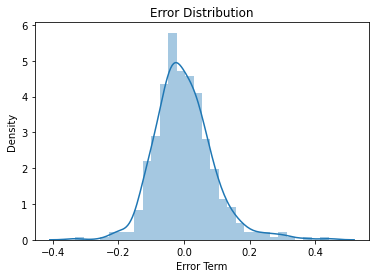

In [100]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train_pred - y_train
sns.distplot(res)
plt.xlabel('Error Term')
plt.title('Error Distribution')
plt.show()

- It can be seen that the Errors are normally distributed and are centric to 0, which means the model created is following the assumption of error being normally distributed across 0

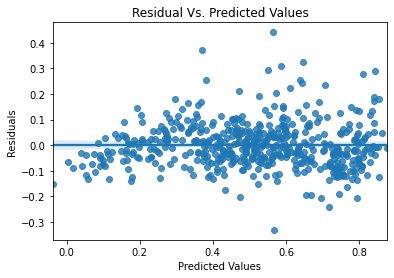

In [101]:
sns.regplot(x=y_train_pred, y=res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- There is no linear relationship between Residuals and predicted variables which mean the error terms are independent

## Predicted points vs Actual points using Train data

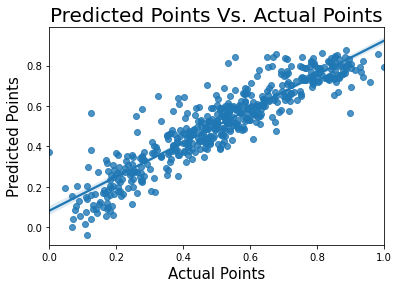

In [102]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

- The residuals are equally distributed across predicted values

# Test Data

In [103]:
numerical_var

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [104]:
df_test[numerical_var] = scaler.transform(df_test[numerical_var])

In [105]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.243430,0.708888,0.287411,0.336516,1,0,...,0,0,0,0,0,0,1,0,0,1
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,1,0,0,0,0,1,0,0,0,1


In [106]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
# Dividing into target variable and feature variable
y_test = df_test.pop('cnt')
X_test = df_test

In [108]:
# Taking only the required features
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [109]:
# predicting using test data
y_test_pred = lr_model.predict(X_test_new)

## Predicted points vs Actual points using Test data

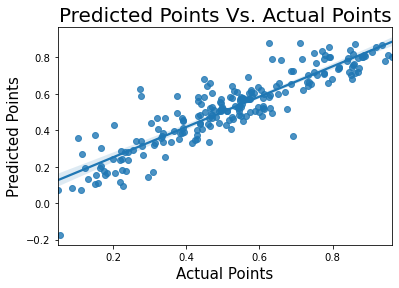

In [110]:
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

- The model seems good enough to predict the demand of bikes post covid. The actual and predicted values are correctly overlapped and there is no overfitting.

# R-squared value with respect to test data

In [111]:
r2_score(y_test,y_test_pred)

0.8160235878128288

### Final model

In [112]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          1.13e-186
Time:                        23:53:27   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2646      0.033      8.069      0.000       0.200       0.329
yr                                                0.2342      0.008     28.835      0.000       0.218       0.250
holiday                                          -0.1090      0.027     -4.066      0.000      -0.162      -0.056
temp                                              0.4362      0.036     12.103      0.000       0.365       0.507
windspeed                                        -0.1590      0.025     -6.339      0.000      -0.208      -0.110
season_spring                                    -0.0719      0.021     -3.365      0.001      -0.114      -0.030
season_summer                                     0.0339      0.015      2.198      0.028       0.004       0.064
season_winter                                     0.0898      0.018      5.041      0.000       0.055       0.125
mnth_December                                    -0.0462      0.018     -2.627      0.009      -0.081      -0.012
mnth_January                                     -0.0503      0.018     -2.753      0.006      -0.086      -0.014
mnth_July                                        -0.0509      0.018     -2.769      0.006      -0.087      -0.015
mnth_November                                    -0.0411      0.019     -2.167      0.031      -0.078      -0.004
mnth_September                                    0.0677      0.017      3.984      0.000       0.034       0.101
weathersit_Light rain_Light snow_Thunderstorm    -0.2939      0.024    -12.008      0.000      -0.342      -0.246
weathersit_Mist_cloudy                           -0.0833      0.009     -9.584      0.000      -0.100      -0.066
workingday                                       -0.0226      0.009     -2.447      0.015      -0.041      -0.004
==============================================================================
Omnibus:                       75.619   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.431
Skew:                          -0.772   Prob(JB):                     6.61e-40
Kurtosis:                       5.471   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Final equation for the line

- cnt = 0.2342*yr - 0.1090*holiday + 0.4362*temp - 0.1590*windspeed - 0.0719*season_spring + 0.0339*season_summer + 0.0898*season_winter - 0.0462*mnth_December - 0.0503*mnth_January - 0.0509*mnth_July - 0.0411*mnth_November + 0.0677*mnth_September - 0.2939*weathersit_Light rain_Light snow_Thunderstorm - 0.0833*weathersit_Mist_cloudy - 0.0226*workingday

- Demand of bike increased for year 2019, and also the increase in demand is based on temp, summer season, winter season, September month

- Demand in bike renting decreased due to following features :
    - holiday, windspeed, spring season, December month, January month, July month, nuvember month, weather is Light rain Light snow or thunderstorm, weather is Mist Cloudy or working day